In [391]:
# Simulation for SAT solving shardware
# reference: Shim, Chaeyun, Jooyoung Bae, and Bongjin Kim. "30.3 VIP-Sat: A Boolean Satisfiability Solver Featuring 5× 12 Variable In-Memory Processing Elements with 98% Solvability for 50-Variables 218-Clauses 3-SAT Problems." 2024 IEEE International Solid-State Circuits Conference (ISSCC). Vol. 67. IEEE, 2024.

In [392]:
# 데이터셋 위치  
# /data2/sat/uf50-218  
# /data2/sat/uf20-91 
# 출처: https://www.cs.ubc.ca/~hoos/SATLIB/benchm.html

In [393]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import copy 
import os
import re
import json
import datetime
from collections import defaultdict


In [394]:
import numpy as np

def read_cnf_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()

    clauses = []

    clause_save_start = False
    clause_count = 0
    for line in lines:
        if clause_save_start == True:
            clause = list(map(int, line.strip().split()))
            assert clause[-1] == 0
            clause = clause[:-1]  # Remove the trailing 0
            clauses.append(clause)
            clause_count += 1
            if clause_count == num_clauses:
                break

        if line.startswith(('p')) and clause_save_start == False:
            clause_save_start = True
            _, _, num_vars, num_clauses = line.split()
            num_vars = int(num_vars)
            num_clauses = int(num_clauses)
    assert clause_save_start == True

    clauses = np.array(clauses)
    return clauses, num_vars, num_clauses

In [395]:
import numpy as np
import matplotlib.pyplot as plt


# 상관 행렬을 그리고 시각화하는 함수 정의
def plot_correlation_matrix(file_path):
    
    clauses, num_vars, num_clauses= read_cnf_file(file_path)

    # clauses 리스트에서 절에 포함된 변수들 중 가장 큰 숫자를 찾아서 변수의 개수를 구함
    num_vars = max(abs(var) for clause in clauses for var in clause)

    # num_vars 크기의 제로 행렬을 만들어서 상관 관계를 표시할 준비
    correlation_matrix = np.zeros((num_vars, num_vars), dtype=int)

    # 각 절(clause)에서 변수를 두 개씩 비교하며 상관 관계를 행렬에 기록
    for clause in clauses:
        for i, var1 in enumerate(clause):
            # 현재 변수(var1)와 같은 절(clause)에 포함된 다른 변수들(var2) 간의 상관 관계를 기록
            for var2 in clause[i+1:]:
                abs_var1, abs_var2 = abs(var1) - 1, abs(var2) - 1  # 변수 인덱스는 0부터 시작하므로 -1 처리
                correlation_matrix[abs_var1, abs_var2] = 1  # 상관된 변수 간에는 1을 표시
                correlation_matrix[abs_var2, abs_var1] = 1  # 상관 행렬은 대칭이므로 반대 방향도 동일하게 처리

    # 그림 사이즈 설정
    plt.figure(figsize=(10, 8))

    # 상관 행렬을 이미지 형식으로 보여줌, 회색으로 표시(cmap='gray')
    plt.imshow(correlation_matrix, cmap='gray', interpolation='nearest')

    # 색상바를 추가하여 상관 관계 값(1: 상관 있음, 0: 상관 없음)을 표시
    plt.colorbar(label='Correlation (1: correlated, 0: uncorrelated)')

    # 그래프 제목 설정
    plt.title(f'Variable Correlation Matrix (Variables: {num_vars}, Clauses: {num_clauses})', fontsize=15)

    # x축과 y축 라벨 설정
    plt.xlabel('Variables')
    plt.ylabel('Variables')

    # x축과 y축에 변수 인덱스를 5단위로 표시하면서 'v' 접두사 추가
    ticks = np.arange(0, num_vars, 5)
    tick_labels = [f'v{i}' for i in ticks]
    plt.xticks(ticks, tick_labels)  # 'v0', 'v5', 'v10'처럼 표시
    plt.yticks(ticks, tick_labels)

    # 그리드라인은 표시하지 않음
    plt.grid(False)

    # 그래프를 화면에 표시
    plt.show()
    return correlation_matrix

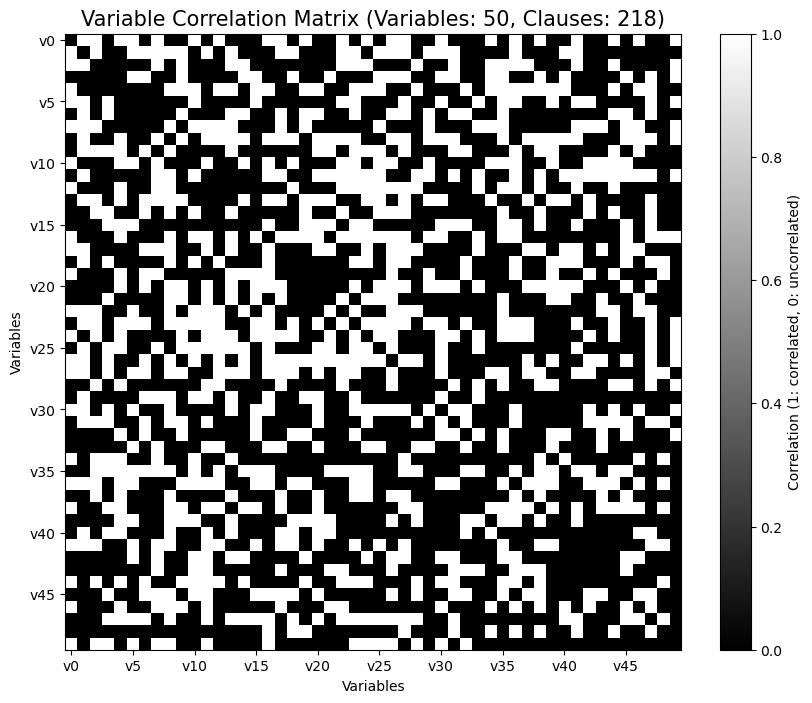

(array([[-45, -37,  -1],
        [-40,  21,  39],
        [ 34,  -8, -13],
        [-16, -21,   5],
        [-22,  36,  16],
        [-46,  19,  11],
        [ 25, -48, -27],
        [-27, -31,  -2],
        [-28,  -7,  -2],
        [ 48,  -5,  29],
        [-38,  28, -21],
        [ -4,  48,  26],
        [-25, -38,  -3],
        [  8,  -3, -50],
        [ -2, -32,  37],
        [ 32, -33,  46],
        [ 30,  34, -17],
        [-28,  39, -15],
        [ 23, -22, -44],
        [ -5,  33,  10],
        [ 11, -44,  37],
        [-25, -26,  50],
        [-19,  -9,   2],
        [ 24, -12,  37],
        [ 45, -39,  49],
        [ -9, -41,  -5],
        [ 12,  22,  26],
        [-25,  32,  16],
        [-42,  39, -16],
        [-45,   1,  39],
        [  5,  13,   9],
        [ -9, -19, -27],
        [ 41,  -4, -22],
        [-10, -22, -25],
        [ 25, -45, -31],
        [-31,  43,  47],
        [ 45, -11,  23],
        [-11, -36,  -6],
        [-18,  -1,   8],
        [ 23,   1,  -2],


In [396]:
file_path = 'example_uf50-03.cnf'
file_path = '/data2/sat/uf50-218/uf50-03.cnf'
correlation_matrix = plot_correlation_matrix(file_path)
read_cnf_file(file_path)

In [397]:
shuffled_abs_vars_range2 = np.argsort(-correlation_matrix.sum(axis=1)) + 1
shuffled_abs_vars_range2

array([ 9, 24, 27, 12, 36, 28, 17, 37,  5, 48, 25, 39, 14, 21, 31, 18, 46,
        1,  2, 26, 11,  8, 42, 45, 23, 10, 32,  4, 40,  7,  3, 16, 19, 13,
        6, 47, 43, 29, 22, 15, 20, 33, 34, 50, 44, 38, 41, 30, 35, 49])

In [405]:
np.argwhere(correlation_matrix==1)+1

array([[ 1,  2],
       [ 1,  3],
       [ 1,  5],
       ...,
       [50, 29],
       [50, 31],
       [50, 33]])

In [406]:
correlation_matrix.sum(axis=1)

array([22, 22, 18, 19, 25, 17, 18, 21, 30, 20, 21, 27, 18, 24, 16, 18, 26,
       22, 18, 16, 24, 16, 20, 29, 25, 21, 28, 26, 16, 13, 22, 20, 16, 15,
       12, 27, 26, 14, 24, 18, 14, 20, 16, 14, 20, 22, 17, 25, 11, 15])

In [411]:
a = np.argwhere(correlation_matrix[3]==1).flatten()
a

array([ 5,  6,  9, 14, 15, 18, 21, 25, 26, 27, 30, 31, 34, 35, 38, 40, 45,
       47, 49])

In [398]:
shuffled_abs_vars_range = np.argsort(-correlation_matrix.sum(axis=1))

combined_array = np.column_stack((shuffled_abs_vars_range, -np.sort(-correlation_matrix.sum(axis=1))))
for kkk in combined_array:
    print(kkk, end=' ')
    for lll in np.where(correlation_matrix[kkk[0]]==1)[0]:
        print(lll, end=' ')
    print()

[ 8 30] 1 4 7 9 11 12 13 14 16 17 18 20 21 22 23 26 27 29 30 31 35 37 38 39 40 41 45 46 47 49 
[23 29] 1 2 4 5 6 8 9 10 11 12 15 16 18 20 22 24 25 26 27 29 30 32 35 36 37 41 44 47 49 
[26 28] 0 1 3 6 8 10 12 14 16 17 18 19 20 21 22 23 24 25 27 28 30 37 39 42 43 45 47 49 
[11 27] 1 7 8 10 16 17 20 21 22 23 24 25 28 29 31 33 36 38 40 41 42 43 44 45 46 47 49 
[35 27] 2 3 4 5 6 7 8 10 12 14 15 16 21 22 23 24 27 28 32 33 36 38 39 41 42 44 45 
[27 26] 0 1 3 5 6 8 9 12 13 14 16 17 18 20 22 23 26 30 34 35 37 38 41 42 47 48 
[16 26] 0 4 8 10 11 13 15 17 18 19 20 22 23 24 25 26 27 29 30 33 35 36 45 47 48 49 
[36 26] 0 1 2 4 5 9 10 11 12 15 16 18 19 23 24 30 31 35 37 38 39 42 43 44 46 48 
[ 4 25] 0 8 9 10 12 13 15 16 19 20 23 24 25 28 32 34 35 36 37 38 39 40 44 46 47 
[47 25] 3 4 5 6 8 11 13 14 15 16 18 20 22 23 24 25 26 27 28 31 40 41 45 46 48 
[24 25] 0 2 4 9 11 12 13 15 16 17 18 21 23 25 26 30 31 33 35 36 37 42 44 47 49 
[38 24] 0 3 4 8 9 11 12 14 15 17 20 27 28 34 35 36 37 39 41 43 44 45 46 4

In [382]:
correlation_matrix.shape

(50, 50)

In [383]:

# 같은 숫자는 섞기
shuffled_abs_vars_range1 = np.concatenate([np.random.shuffle(group) or group for group in [np.where(correlation_matrix.sum(axis=1) == total)[0] for total in sorted(set(correlation_matrix.sum(axis=1)), reverse=True)]], axis=0) + 1 if np.random.seed((42+1)*(1+1)*(1+1)) is None else None
# 같은 숫자도 놔둬
shuffled_abs_vars_range2 = np.argsort(-correlation_matrix.sum(axis=1)) + 1
# 걍 무조건 랜덤 
random.shuffle(shuffled_abs_vars_range3 := list(range(1, 50 + 1)))



print('correlation_matrix.sum(axis=1)\n', correlation_matrix.sum(axis=1))
print('correlation_matrix.sum(axis=1) sorted\n', -np.sort(-correlation_matrix.sum(axis=1)))
print('shuffled_abs_vars_range1\n', shuffled_abs_vars_range1)
print('shuffled_abs_vars_range2\n', shuffled_abs_vars_range2)

correlation_matrix.sum(axis=1)
 [22 22 18 19 25 17 18 21 30 20 21 27 18 24 16 18 26 22 18 16 24 16 20 29
 25 21 28 26 16 13 22 20 16 15 12 27 26 14 24 18 14 20 16 14 20 22 17 25
 11 15]
correlation_matrix.sum(axis=1) sorted
 [30 29 28 27 27 26 26 26 25 25 25 24 24 24 22 22 22 22 22 21 21 21 20 20
 20 20 20 19 18 18 18 18 18 18 17 17 16 16 16 16 16 16 15 15 14 14 14 13
 12 11]
shuffled_abs_vars_range1
 [ 9 24 27 36 12 37 17 28  5 25 48 21 39 14 46  2  1 31 18 26 11  8 10 23
 45 32 42  4  7 13  3 19 40 16 47  6 43 29 15 22 20 33 34 50 41 44 38 30
 35 49]
shuffled_abs_vars_range2
 [ 9 24 27 12 36 28 17 37  5 48 25 39 14 21 31 18 46  1  2 26 11  8 42 45
 23 10 32  4 40  7  3 16 19 13  6 47 43 29 22 15 20 33 34 50 44 38 41 30
 35 49]


In [384]:
cor_sum = correlation_matrix.sum(axis=1)
cor_sum

array([22, 22, 18, 19, 25, 17, 18, 21, 30, 20, 21, 27, 18, 24, 16, 18, 26,
       22, 18, 16, 24, 16, 20, 29, 25, 21, 28, 26, 16, 13, 22, 20, 16, 15,
       12, 27, 26, 14, 24, 18, 14, 20, 16, 14, 20, 22, 17, 25, 11, 15])

In [385]:
import numpy as np

from_figure = np.zeros((5, 6))
from_figure[0][0], from_figure[0][1], from_figure[0][2], from_figure[0][3], from_figure[0][4], from_figure[0][5] = 8, 23, 26, 27, 16, 47
from_figure[1][0], from_figure[1][1], from_figure[1][2], from_figure[1][3], from_figure[1][4], from_figure[1][5] = 36, 38, 35, 24, 1, 30
from_figure[2][0], from_figure[2][1], from_figure[2][2], from_figure[2][3], from_figure[2][4], from_figure[2][5] = 25, 13, 11, 45, 44, 17
from_figure[3][0], from_figure[3][1], from_figure[3][2], from_figure[3][3], from_figure[3][4], from_figure[3][5] = 6, 31, 9, 39, 43, 10
from_figure[4][0], from_figure[4][1], from_figure[4][2], from_figure[4][3], from_figure[4][4], from_figure[4][5] = 28, 33, 34, 40, 46, 12

my_index=from_figure.astype(int)
indexed_cor_sum = cor_sum[my_index] # form_figure값이 제대로 들어간 듯?

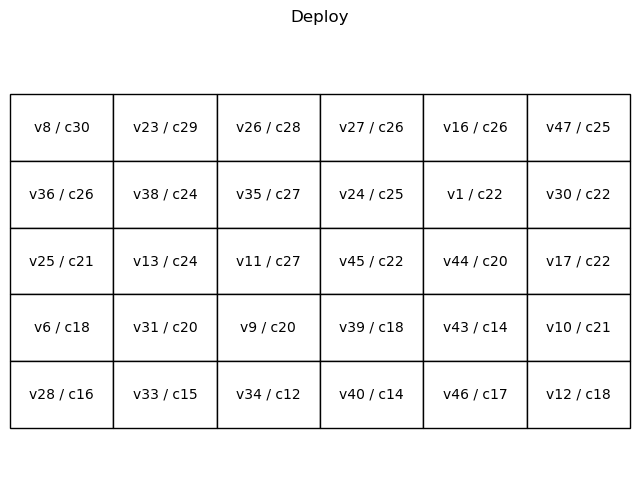

In [386]:
import numpy as np
import matplotlib.pyplot as plt


# 두 배열을 병합하여 문자열 형식으로 변환
combined_data = np.array([[f"v{int(d2)} / c{int(d1)}" for d1, d2 in zip(row1, row2)] for row1, row2 in zip(indexed_cor_sum, my_index)])

# 그림으로 표시
plt.figure(figsize=(8, 6))
plt.axis('off')  # 축 제거
table = plt.table(cellText=combined_data, loc='center', cellLoc='center')
table.scale(1, 4)  # 셀 크기 조정
plt.title("Deploy")
plt.show()

In [387]:
import itertools
import numpy as np


def find_uncorrelated_combinations(correlation_matrix, set_size=5):
    uncorrelated_combinations = []
    # 모든 가능한 변수의 조합을 찾음
    all_combinations = itertools.combinations(range(correlation_matrix.shape[0]), set_size)

    for combination in all_combinations:
        # 각 조합의 변수들이 서로 독립적인지 확인
        if all(correlation_matrix[i][j] == 0 for i, j in itertools.combinations(combination, 2)):
            uncorrelated_combinations.append(combination)
    
    return uncorrelated_combinations

uncorrelated_combinations = find_uncorrelated_combinations(correlation_matrix, set_size=5)

cor_sum_list = np.array([sum(correlation_matrix.sum(axis=1)[idx] for idx in comb) for comb in uncorrelated_combinations])

sort_idex =np.argsort(-np.array(cor_sum_list))
sorted_5_combinations = np.array(uncorrelated_combinations)[sort_idex]

cor_sum_list_sorted = cor_sum_list[sort_idex]

for i, comb in enumerate(sorted_5_combinations, 0):
    print(f"Combination {i}: {comb}", cor_sum_list_sorted[i])


Combination 0: [ 0 11 13 18 35] 118
Combination 1: [11 13 26 35 48] 117
Combination 2: [13 26 31 35 46] 116
Combination 3: [ 9 17 30 35 47] 116
Combination 4: [ 2  4  5 11 26] 115
Combination 5: [ 9 11 26 34 35] 114
Combination 6: [13 26 32 36 41] 114
Combination 7: [ 0  9 11 18 35] 114
Combination 8: [ 9 11 18 30 35] 114
Combination 9: [13 26 33 36 41] 113
Combination 10: [ 5 13 26 31 38] 113
Combination 11: [ 9 11 26 35 48] 113
Combination 12: [13 22 36 41 45] 112
Combination 13: [ 9 11 19 30 35] 112
Combination 14: [17 19 30 35 47] 112
Combination 15: [13 23 31 33 38] 112
Combination 16: [ 0 13 23 33 45] 112
Combination 17: [ 5 11 13 26 32] 112
Combination 18: [ 0 13 18 31 35] 111
Combination 19: [ 0 11 13 35 48] 111
Combination 20: [ 1  3 10 20 24] 111
Combination 21: [ 4  5  7 26 31] 111
Combination 22: [ 3  8 10 24 32] 111
Combination 23: [ 3  8 10 19 24] 111
Combination 24: [ 6  8 25 28 36] 111
Combination 25: [13 26 31 33 38] 111
Combination 26: [ 3  8 10 24 28] 111
Combination